In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import requests

In [2]:
df_tau_prev = pd.read_csv('data/2000/tau_ij.csv', dtype={0:str}, index_col=0)
df_t_prev = pd.read_csv('data/2000/t_ij.csv', dtype={0:str}, index_col=0)
df_tau_next = pd.read_csv('data/2020/tau_ij.csv', dtype={0:str}, index_col=0)
df_t_next = pd.read_csv('data/2020/t_ij.csv', dtype={0:str}, index_col=0)
gdf_jcode = gpd.read_file('data/setup_2000_2020/jcode.geojson')

In [3]:
df = pd.DataFrame(((df_t_prev - df_t_next)*df_t_prev).unstack()).reset_index(names=['ori_jcode','dst_jcode'])
df = df.merge(gdf_jcode[['jcode','N03_004']], left_on='ori_jcode', right_on='jcode').drop(columns='jcode')
df = df.merge(gdf_jcode[['jcode','N03_004']], left_on='dst_jcode', right_on='jcode').drop(columns='jcode')

In [48]:
df

,ori_jcode,dst_jcode,0,N03_004_x,N03_004_y
0,08220,08220,0.000000,つくば市,つくば市
1,08224,08220,0.000000,守谷市,つくば市
2,08235,08220,0.000000,つくばみらい市,つくば市
3,11203,08220,0.000000,川口市,つくば市
4,11204,08220,0.000000,浦和市,つくば市
...,...,...,...,...,...
12316,14207,14216,0.000487,茅ヶ崎市,座間市
12317,14209,14216,0.000692,相模原市,座間市
12318,14213,14216,0.000000,大和市,座間市
12319,14215,14216,0.000000,海老名市,座間市


In [49]:
df[df[0]>0].to_csv('data/2000_2020_diff.csv')

array([[<Axes: title={'center': '0'}>]], dtype=object)

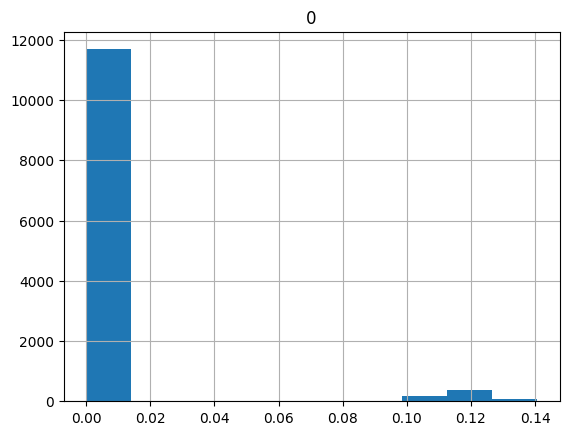

In [50]:
pd.DataFrame(np.ravel(df[0])).hist()

In [68]:
list_tx = ['08220','08224','08235','12217','12220','11237','11234']
df_time_ij_sim = df_t_next
df_time_ij_sim.loc[:,list_tx] = df_t_prev.loc[:,list_tx]
df_time_ij_sim.loc[list_tx,:] = df_t_prev.loc[list_tx,:]
# df_time_ij_sim.loc[list_tx,list_tx] = df_time_ij_sim.loc[list_tx,list_tx]/0.50
df_time_ij_sim

,08220,08224,08235,11203,11204,11205,11208,11219,11220,11221,...,14135,14136,14137,14204,14205,14207,14209,14213,14215,14216
ori_jcode,,,,,,,,,,,,,,,,,,,,,
08220,0.003500,0.013069,0.006569,0.375000,0.375000,0.375000,0.375000,0.118056,0.375000,0.375000,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
08224,0.012458,0.012951,0.007243,0.069444,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
08235,0.006264,0.007486,0.016771,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
11203,0.375000,0.072917,0.375000,0.021944,0.028264,0.031035,0.031250,0.036979,0.026667,0.028292,...,0.062500,0.375000,0.375000,0.111111,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
11204,0.375000,0.375000,0.375000,0.029632,0.019076,0.018868,0.027778,0.042056,0.017715,0.012153,...,0.045139,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.083333,0.086806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.375000,0.375000,0.375000,0.375000,0.094444,0.086806,0.013889,0.375000,0.096528,0.375000,...,0.027778,0.062500,0.059722,0.040111,0.026097,0.019722,0.026465,0.050076,0.041514,0.055556
14209,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.065326,0.375000,0.375000,0.375000,...,0.050611,0.058861,0.031556,0.020833,0.026125,0.023472,0.025229,0.042424,0.045382,0.036639
14213,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.037507,0.030097,0.034556,0.051389,0.031167,0.049181,0.042410,0.017569,0.035611,0.031854


In [70]:
df_time_ij_sim.to_csv('data/2020/t_ij_sim.csv')